In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

Load the dataset into the tool.





In [106]:
from google.colab import files
files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


{'Mall_Customers.csv': b'CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)\r\n1,Male,19,15,39\r\n2,Male,21,15,81\r\n3,Female,20,16,6\r\n4,Female,23,16,77\r\n5,Female,31,17,40\r\n6,Female,22,17,76\r\n7,Female,35,18,6\r\n8,Female,23,18,94\r\n9,Male,64,19,3\r\n10,Female,30,19,72\r\n11,Male,67,19,14\r\n12,Female,35,19,99\r\n13,Female,58,20,15\r\n14,Female,24,20,77\r\n15,Male,37,20,13\r\n16,Male,22,20,79\r\n17,Female,35,21,35\r\n18,Male,20,21,66\r\n19,Male,52,23,29\r\n20,Female,35,23,98\r\n21,Male,35,24,35\r\n22,Male,25,24,73\r\n23,Female,46,25,5\r\n24,Male,31,25,73\r\n25,Female,54,28,14\r\n26,Male,29,28,82\r\n27,Female,45,28,32\r\n28,Male,35,28,61\r\n29,Female,40,29,31\r\n30,Female,23,29,87\r\n31,Male,60,30,4\r\n32,Female,21,30,73\r\n33,Male,53,33,4\r\n34,Male,18,33,92\r\n35,Female,49,33,14\r\n36,Female,21,33,81\r\n37,Female,42,34,17\r\n38,Female,30,34,73\r\n39,Female,36,37,26\r\n40,Female,20,37,75\r\n41,Female,65,38,35\r\n42,Male,24,38,92\r\n43,Male,48,39,36\r\n44,Female,31,

In [107]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [110]:
dummy=pd.get_dummies(df['Gender'])
dummy.head()

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [111]:
df2=pd.concat((df,dummy),axis=1)
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,1
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,0


In [112]:
df2.drop(['Gender'],axis=1)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


In [113]:
df2=df2.drop(['Gender'],axis=1)
df2.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [114]:
df2=df2.drop(['Male'],axis=1)
df2.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,1
3,4,23,16,77,1
4,5,31,17,40,1


In [115]:
df2.rename(columns={"Female":"Gender"})

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,1
3,4,23,16,77,1
4,5,31,17,40,1
...,...,...,...,...,...
195,196,35,120,79,1
196,197,45,126,28,1
197,198,32,126,74,0
198,199,32,137,18,0


In [116]:
df.shape

(200, 5)

In [117]:
df.info

<bound method DataFrame.info of      CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Female
0             1   19                  15                      39       0
1             2   21                  15                      81       0
2             3   20                  16                       6       1
3             4   23                  16                      77       1
4             5   31                  17                      40       1
..          ...  ...                 ...                     ...     ...
195         196   35                 120                      79       1
196         197   45                 126                      28       1
197         198   32                 126                      74       0
198         199   32                 137                      18       0
199         200   30                 137                      83       0

[200 rows x 5 columns]>

Perform Below Visualizations.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


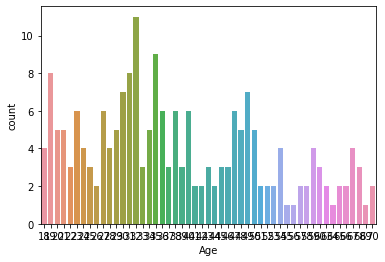

In [118]:
#Univariate Analysis
sns.countplot(df['Age'])


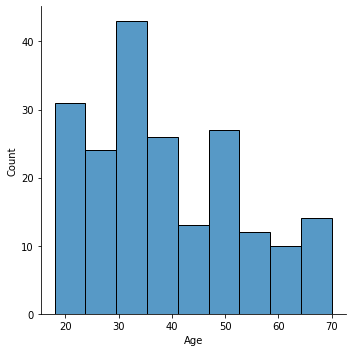

In [119]:
sns.displot(df.Age)

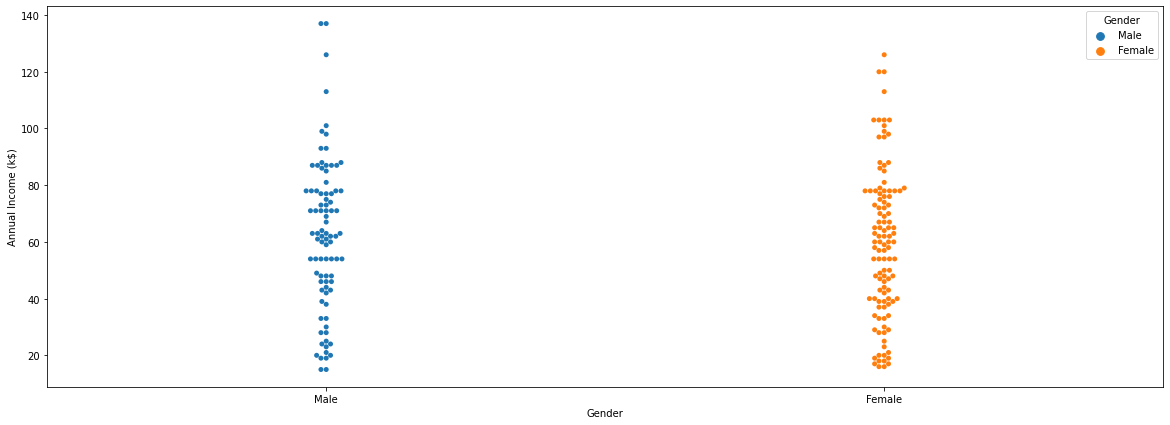

In [122]:
#Bivariate Analysis
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Gender', y = 'Annual Income (k$)', data = df, hue = 'Gender')

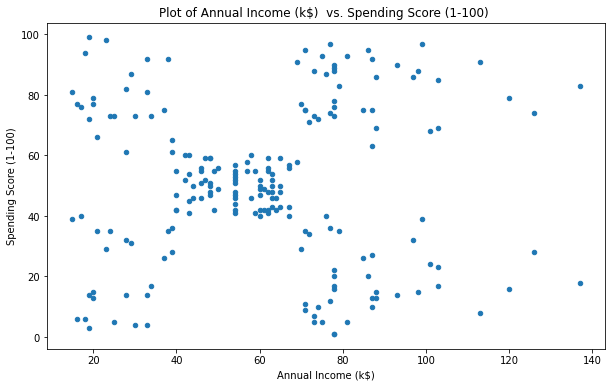

In [123]:
df.plot.scatter("Annual Income (k$)", "Spending Score (1-100)", figsize=(10, 6),
                title="Plot of Annual Income (k$)  vs. Spending Score (1-100) ")
plt.show()
plt.close()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


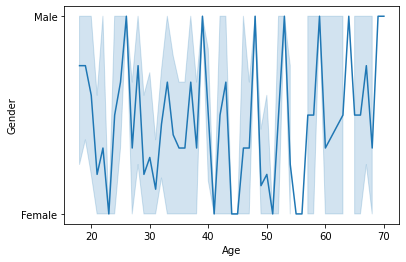

In [186]:
sns.lineplot(df.Age,df.Gender)

<Figure size 1440x360 with 0 Axes>

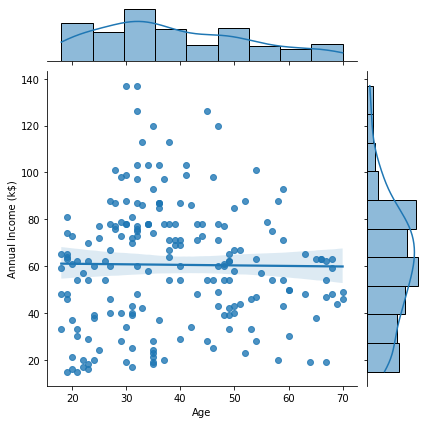

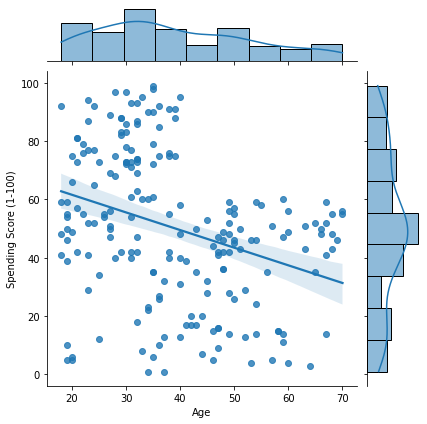

In [ ]:
plt.figure(figsize=(20, 5))

_ = sns.jointplot(data=df, x='Age', y='Annual Income (k$)', kind='reg')
_ = sns.jointplot(data=df, x='Age', y='Spending Score (1-100)', kind='reg')

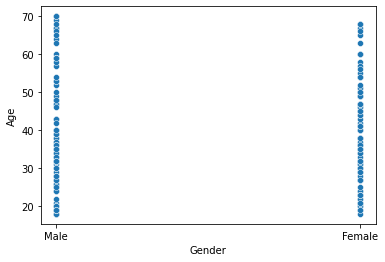

In [ ]:
sns.scatterplot(x=df["Gender"],y=df["Age"])

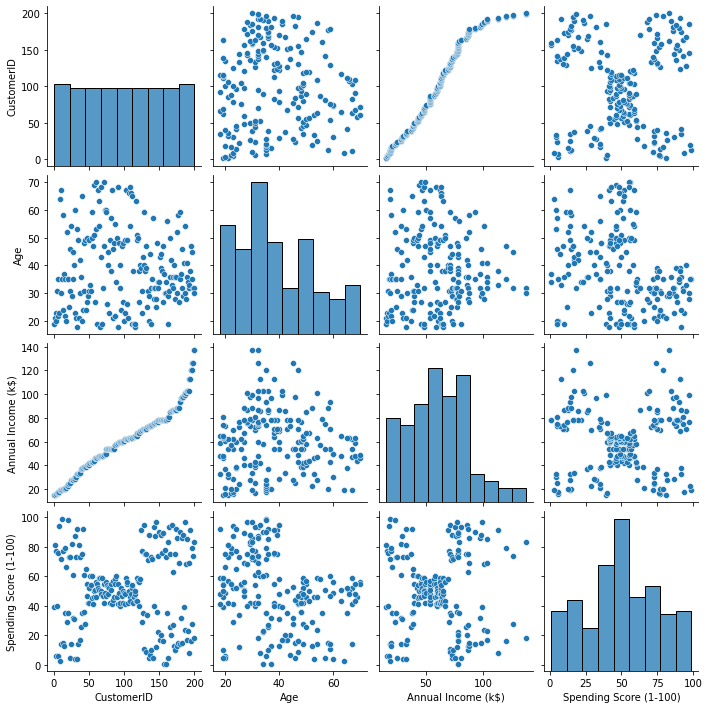

In [ ]:
#Multivariate Analysis
sns.pairplot(df)

Perform descriptive statistics on the dataset.




In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Check for Missing values and deal with them

In [ ]:
df.isnull().sum().sort_values(ascending=False)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Find the outliers and replace them outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


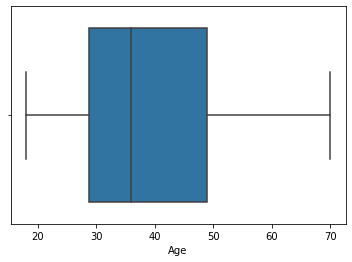

In [ ]:
sns.boxplot(df.Age)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


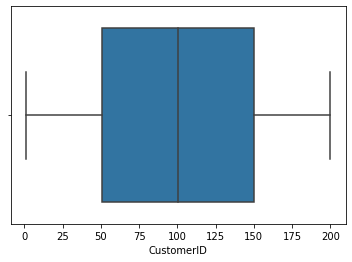

In [ ]:
sns.boxplot(df.CustomerID)

Check for Categorical columns and perform encoding.


In [126]:
df=pd.get_dummies(df,columns=['CustomerID'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),CustomerID_1,CustomerID_2,CustomerID_3,CustomerID_4,CustomerID_5,CustomerID_6,...,CustomerID_191,CustomerID_192,CustomerID_193,CustomerID_194,CustomerID_195,CustomerID_196,CustomerID_197,CustomerID_198,CustomerID_199,CustomerID_200
0,Male,19,15,39,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Male,21,15,81,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Female,20,16,6,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Female,23,16,77,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Female,31,17,40,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Scaling the data

In [189]:
from sklearn.preprocessing import scale

In [41]:
x_scaled=pd.DataFrame(scale(X),columns=X.columns)
x_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100),CustomerID_1,CustomerID_2,CustomerID_3,CustomerID_4,CustomerID_5,CustomerID_6,CustomerID_7,...,CustomerID_191,CustomerID_192,CustomerID_193,CustomerID_194,CustomerID_195,CustomerID_196,CustomerID_197,CustomerID_198,CustomerID_199,CustomerID_200
0,-1.424569,-1.738999,-0.434801,14.106736,-0.070888,-0.070888,-0.070888,-0.070888,-0.070888,-0.070888,...,-0.070888,-0.070888,-0.070888,-0.070888,-0.070888,-0.070888,-0.070888,-0.070888,-0.070888,-0.070888
1,-1.281035,-1.738999,1.195704,-0.070888,14.106736,-0.070888,-0.070888,-0.070888,-0.070888,-0.070888,...,-0.070888,-0.070888,-0.070888,-0.070888,-0.070888,-0.070888,-0.070888,-0.070888,-0.070888,-0.070888
2,-1.352802,-1.700830,-1.715913,-0.070888,-0.070888,14.106736,-0.070888,-0.070888,-0.070888,-0.070888,...,-0.070888,-0.070888,-0.070888,-0.070888,-0.070888,-0.070888,-0.070888,-0.070888,-0.070888,-0.070888
3,-1.137502,-1.700830,1.040418,-0.070888,-0.070888,-0.070888,14.106736,-0.070888,-0.070888,-0.070888,...,-0.070888,-0.070888,-0.070888,-0.070888,-0.070888,-0.070888,-0.070888,-0.070888,-0.070888,-0.070888
4,-0.563369,-1.662660,-0.395980,-0.070888,-0.070888,-0.070888,-0.070888,14.106736,-0.070888,-0.070888,...,-0.070888,-0.070888,-0.070888,-0.070888,-0.070888,-0.070888,-0.070888,-0.070888,-0.070888,-0.070888


Perform any of the clustering algorithms and 
Add the cluster data with the primary dataset

In [42]:
from sklearn import cluster

In [128]:
error=[]
for i in range(1,11):
  kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(df2)
  error.append(kmeans.inertia_)
  

In [138]:
error

[975512.0600000003,
 387065.71377137717,
 271384.508782868,
 195401.19855991466,
 157157.7579059829,
 122625.19813553878,
 103233.01724386725,
 86053.67444777445,
 76938.97565600359,
 69231.3360761156]

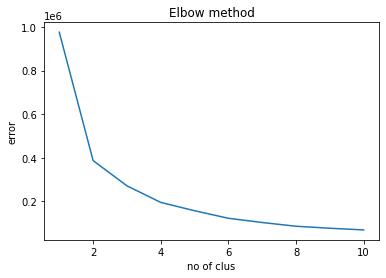

In [130]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('no of clus')
plt.ylabel('error')
plt.show()

In [194]:
km_model=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)

In [132]:
km_model.fit(df2)

KMeans(n_clusters=10, random_state=0)

In [169]:
km_model.predict(df2)

array([5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9,
       5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 1,
       5, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 7, 4,
       4, 7, 7, 4, 7, 4, 4, 4, 7, 4, 7, 4, 4, 7, 7, 4, 7, 4, 7, 7, 7, 7,
       7, 4, 7, 4, 4, 4, 7, 7, 7, 7, 4, 7, 7, 8, 0, 8, 0, 8, 0, 8, 0, 8,
       0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8,
       0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2,
       6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2,
       6, 2], dtype=int32)

In [137]:
km_model.predict([[19,21,20,23,31]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


array([5], dtype=int32)

Split the data into dependent and independent
variables.

In [140]:
y=df['Age']
y

0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64

In [142]:
X=df.drop(columns=['Gender'],axis=1)
X.head()

,Age,Annual Income (k$),Spending Score (1-100),CustomerID_1,CustomerID_2,CustomerID_3,CustomerID_4,CustomerID_5,CustomerID_6,CustomerID_7,...,CustomerID_191,CustomerID_192,CustomerID_193,CustomerID_194,CustomerID_195,CustomerID_196,CustomerID_197,CustomerID_198,CustomerID_199,CustomerID_200
0,19,15,39,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,21,15,81,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20,16,6,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,16,77,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,31,17,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


 Split the data into training and testing

In [143]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=0)

 Build the Model

In [195]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [145]:
r=Ridge()
l=Lasso()

In [146]:
r.fit(X_train,y_train)

Ridge()

In [147]:
l.fit(X_train,y_train)

Lasso()

Train the model

In [148]:
pred1=r.predict(X_test)
pred1

array([45.40190903, 40.56733809, 45.56811187, 43.06755995, 32.70560084,
       43.12534643, 30.37011146, 43.26168608, 48.58966798, 42.09175307,
       29.77544482, 34.21018815, 38.50510145, 43.56977944, 46.72528056,
       30.13331981, 27.96638989, 43.84702599, 33.98940373, 47.76080314,
       32.85588314, 32.11625646, 31.62552153, 33.90237619, 52.30550922,
       37.22539382, 35.44553785, 32.95775026, 38.90964643, 44.08038004,
       37.65752793, 42.69828709, 41.76213554, 29.7794493 , 43.64602056,
       36.05640641, 37.38099427, 35.70728062, 42.12114016, 50.7276423 ])

In [149]:
pred1_train=r.predict(X_train)

In [150]:
pred2=l.predict(X_test)
pred2

array([51.0750721 , 39.90569023, 52.93663574, 47.35194481, 27.80552655,
       45.49038116, 23.15161744, 47.35194481, 56.65976303, 43.62881752,
       20.35927197, 31.52865384, 37.11334477, 46.42116299, 55.7289812 ,
       24.08239926, 19.42849015, 46.42116299, 30.59787201, 57.59054485,
       29.66709019, 28.73630837, 25.01318108, 30.59787201, 67.82914489,
       38.97490841, 35.25178112, 30.59787201, 39.90569023, 48.28272663,
       35.25178112, 46.42116299, 42.6980357 , 20.35927197, 45.49038116,
       36.18256294, 38.04412659, 31.52865384, 45.49038116, 64.1060176 ])

In [151]:
pred2_train=l.predict(X_train)

In [163]:
profit=pd.DataFrame({'Actual':y_test,'ridge_pred':pred1,'lasso_pred':pred2})
profit.head(11)

,Actual,ridge_pred,lasso_pred
18,52,45.401909,51.075072
170,40,40.567338,39.905690
107,54,45.568112,52.936636
98,48,43.067560,47.351945
177,27,32.705601,27.805527
182,46,43.125346,45.490381
5,22,30.370111,23.151617
146,48,43.261686,47.351945
12,58,48.589668,56.659763
152,44,42.091753,43.628818


Test the model

In [180]:
p=r.predict([[5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9,
       5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 1,
       5, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 7, 4,
       4, 7, 7, 4, 7, 4, 4, 4, 7, 4, 7, 4, 4, 7, 7, 4, 7, 4, 7, 7, 7, 7,
       7, 4, 7, 4, 4, 4, 7, 7, 7, 7, 4, 7, 7, 8, 0, 8, 0, 8, 0, 8, 0, 8,
       0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8,
       0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2,
       6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2,
       6, 2,4,6,7]])
print(p)
p1=l.predict([[5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9,
       5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 1,
       5, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 7, 4,
       4, 7, 7, 4, 7, 4, 4, 4, 7, 4, 7, 4, 4, 7, 7, 4, 7, 4, 7, 7, 7, 7,
       7, 4, 7, 4, 4, 4, 7, 7, 7, 7, 4, 7, 7, 8, 0, 8, 0, 8, 0, 8, 0, 8,
       0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8,
       0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2,
       6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2,
       6, 2,4,6,7]])
print(p1)



[34.6929234]
[103.68305171]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"


Measure the performance using Evaluation Metrics

In [181]:
from sklearn import metrics

In [190]:
# R-Square
# testing accuracy for both model
print(metrics.r2_score(y_test,pred1))
print(metrics.r2_score(y_test,pred2))

0.728431906852201
0.995175995732047


In [191]:
#Training accuracy for both model

print(metrics.r2_score(y_train,pred1_train))
print(metrics.r2_score(y_train,pred2_train))

0.9999927831781418
0.9952088438199637


In [192]:
## MSE(Mean square error)

print(metrics.mean_squared_error(y_test,pred1))
print(metrics.mean_squared_error(y_test,pred2))

44.71640221771658
0.7943205427611527


In [193]:
## RMSE

print(np.sqrt(metrics.mean_squared_error(y_test,pred1)))
print(np.sqrt(metrics.mean_squared_error(y_test,pred2)))

6.687032392453066
0.8912466228610085
